In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In exercise 4.1 we used seaborn to control figure aesthetics, however seaborn has much more to offer. Seaborn works especially well with pandas DataFrames; in most cases seaborn will take care of extracting the data from the DataFrame. In the following exercises we will explore some of the plotting functionatity of seaborn. Most plotting functions in seaborn have a similar syntax: `sns.functionname(data=df,x='column_x',y='column_y')`, where `column_x` and `column_y` are columns in DataFrame `df`. 

In this exercise we will use the sample dataset *tips*. Load it with the code below and have a look at the data.

In [2]:
df = sns.load_dataset("tips")
display(df)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# Scatterplot

Next, we use `sns.scatterplot` to make a scatter plot: 

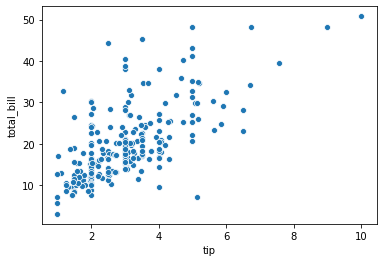

In [3]:
sns.scatterplot(data=df,x='tip',y='total_bill')

As you can see, seaborn uses the column names to automatically set the axes labels. 

There is a lot more data that is not being visualized. More information could be put in the color of the dots and the shape of the dots, which can be achieved with the arguments `hue` and `style`. Both these arguments should be set to a column name. Add `hue` and `style` to the scatter plot. What do they do?

* `hue` changes the color of the markers based on the column that it is set to
* `style` changes the style of the markers based on the column that it is set to

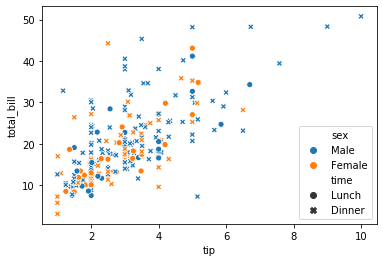

In [4]:
sns.scatterplot(data=df,x='tip',y='total_bill',hue='sex',style='time')

The scatterplot shown above gives you insight in the relation between tip and bill. Set up a plot that gives insight in the relation between the tip and the number of diners.

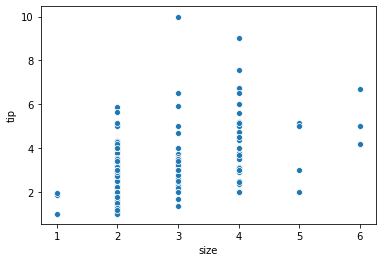

In [5]:
sns.scatterplot(data=df,y='tip',x='size')

Do you think this is an informative plot? Can you think of any better kinds of plots?

*This is a bit informative, but there is a lot of overlap. It could help to shift the points a bit on the x-axis.*

# Categorical plots

You can divide data into two categories (no pun intented): numerical data and categorical data, like the group size. Note that group size is actually both numerical and categorical. 

Have look at the data on tipping. Which columns do you think are categorical and which are numerical, and are there any columns that could be both?


In [6]:
display(df.dtypes)

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

Conceptually, we have the following:
* `sex`, `smoker`, `day`, `time` and `size` are categorical
* `total_bill`, `tip`, and `size` are numerical
* `size` can be both

However, for seaborn all columns are categorical, and `total_bill`, `tip` and `size` are also numerica.

The function `sns.stripplot` is used in a similar manner as `sns.scatterplot`. Create a strip plot with the group size on the x-axis and the tip on the y-axis.

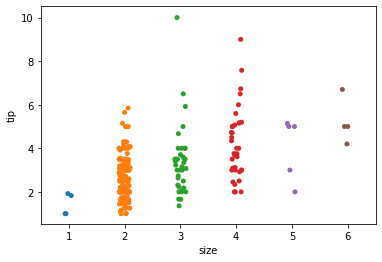

In [7]:
sns.stripplot(x="size", y="tip", data=df);

How does this differ from the scatter plot you made earlier?

*The points are shifted a pot on the x-axis, which gives insight in the density*

`hue` also works with `stripplot`; use this to differentiate between men and women.

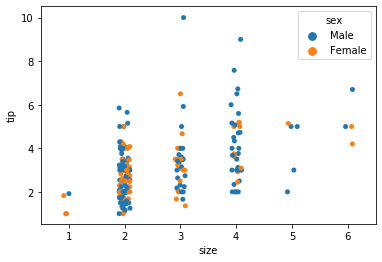

In [8]:
sns.stripplot(x="size", y="tip", data=df, hue='sex');

There several other function to plot categorical data:
- `sns.swarmplot`
- `sns.boxplot`
- `sns.violinplot`
- `sns.barplot`

Try out these functions with the tipping data

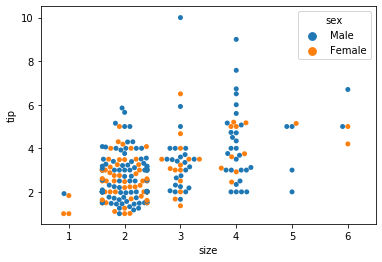

In [9]:
sns.swarmplot(x="size", y="tip", data=df, hue='sex')

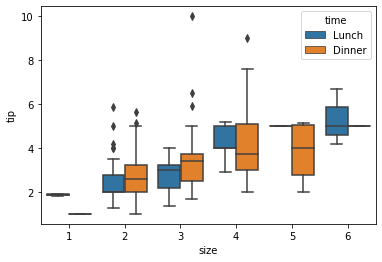

In [10]:
sns.boxplot(x="size", y="tip", data=df, hue='time')

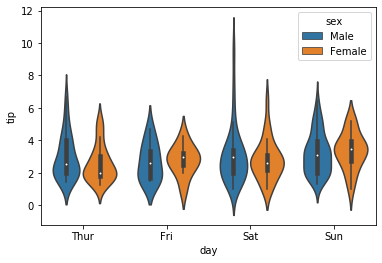

In [11]:
sns.violinplot(x="day", y="tip", data=df, hue='sex')

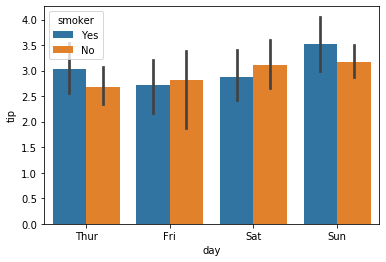

In [12]:
sns.barplot(x="day", y="tip", data=df, hue='smoker')

# Seaborn and matplotlib

Seaborn is built on top of matplotlib, which means that all matplotlib functions work with seaborn plots. Before, we used the matplotlib `Axis` object (`ax`) to modify plots. In order to create a Seaborn plot on a specific matplotlib `Axis`, the `ax` argument must be used:

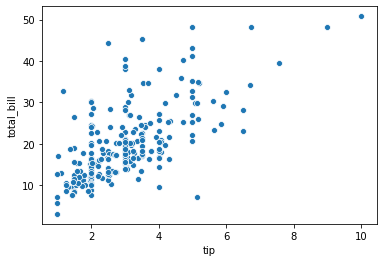

In [13]:
fig = plt.figure()
ax = plt.gca()
sns.scatterplot(data=df,x='tip',y='total_bill',ax=ax)

Use matplotlib functions to:
* add a title
* change the axes labels
* save this figure to file

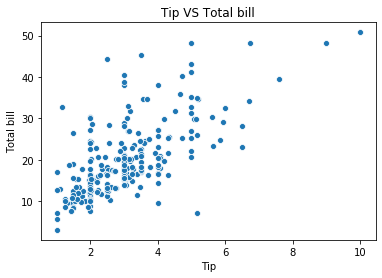

In [14]:
fig = plt.figure()
ax = plt.gca()
sns.scatterplot(data=df,x='tip',y='total_bill',ax=ax)
ax.set(xlabel='Tip',ylabel='Total bill',title='Tip VS Total bill')
plt.savefig('plot.png')

# Pair plots

With the plotting functions above, we were only able to look at one numerical column. With `pairplot` we can inspect all numerical columns at once:

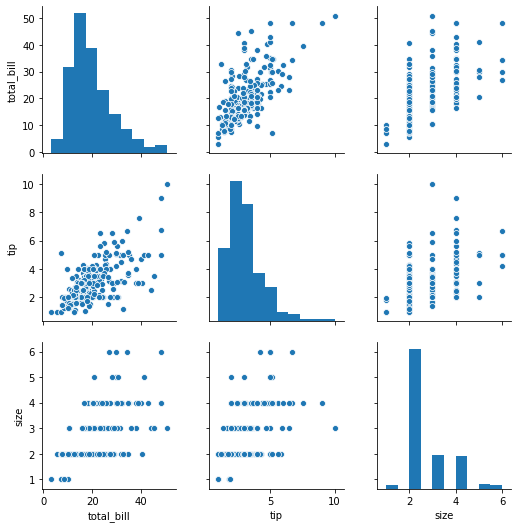

In [15]:
sns.pairplot(df)

You can specify the columns that should be included with the `vars` argument. What column(s) do you think could be left out? Make a pairplot that does not include that column.

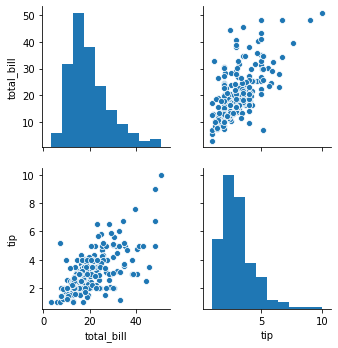

In [16]:
# leave out size 
sns.pairplot(df,vars=['total_bill','tip'])

`pairplot` does support `hue`; map gender on the pairplot.

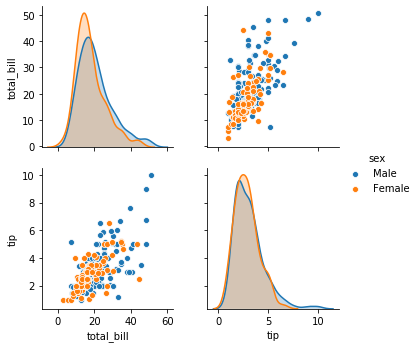

In [17]:
sns.pairplot(df,vars=['total_bill','tip'],hue='sex')

Interestingly, more happens than just the mapping of the genders. This is because the kind of plot for the on-diagonal plots is set to auto. You can change this with the argument `diag_kind`. Use the documentation to figure out what values `diag_kind` can have and get the histograms back.

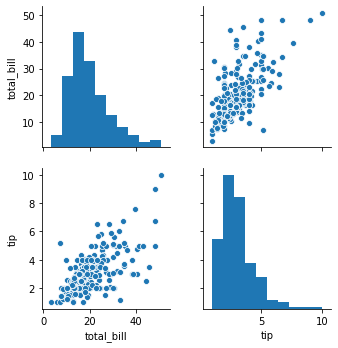

In [18]:
sns.pairplot(df,vars=['total_bill','tip'],diag_kind='hist')

It is also possible to draw a regression plot instead of the scatter plot on the off-diagonal plots. Look into the documentation of `pairplot` for this option and create a pariplot with regression plots.

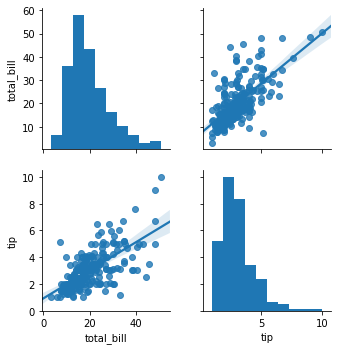

In [19]:
sns.pairplot(df,vars=['total_bill','tip'],kind='reg')

# Advanced plot

Reproduce this plot using `subplot`, Seaborn's function for figure aesthetics and Seaborn's categorical plot function.

<img src="advanced_plot.svg" width="70%">



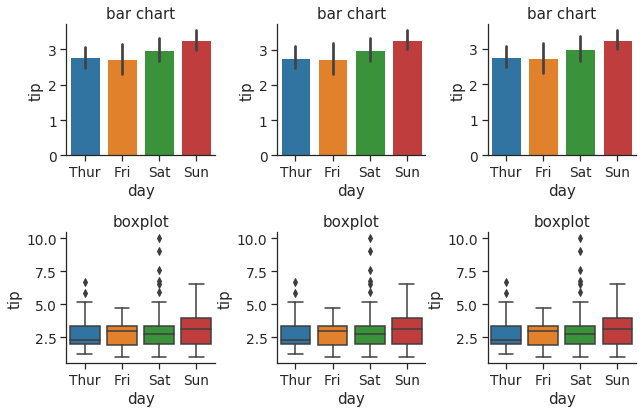

In [20]:
sns.set_style("ticks")
sns.set_style("ticks",{"axes.spines.top":False,"axes.spines.right":False})
sns.set_context("notebook",font_scale=1.25)

cat_cols = ['sex','smoker','time']
x = 'day'
y = 'tip'
fig,axes = plt.subplots(2,len(cat_cols),figsize=(9,6))
for i,cat in enumerate(cat_cols):
    sns.barplot(x=x,y=y,data=df,ax=axes[0,i])
    axes[0,i].set(title='bar chart')
    sns.boxplot(x=x,y=y,data=df,ax=axes[1,i])
    axes[1,i].set(title='boxplot')
plt.tight_layout()